# Classifier To Predicting Primary Contributory Cause of Car Crashes in Chicago


### Final Project Submission

##### Student name:
Nyairo Caroline Gesaka

#### Student pace: 
Part time

#### Scheduled project review date/time:

#### Instructor name: 
William Okomba and Noah Kandie

# 1. Business problem

### 1.1. Objective
The goal is to develop a machine learning classifier capable of predicting the primary contributory cause of car accidents in Chicago.
By accurately identifying these causes, the City of Chicago and the Vehicle Safety Board can take targeted actions 
to enhance road safety and reduce the frequency and severity of car accidents.

### 1.2. Stakeholder
The primary stakeholders for this project are:

City of Chicago: The city's traffic management and road safety departments will utilize the insights to improve traffic safety measures.

Vehicle Safety Board: This board will use the data to formulate policies, launch safety campaigns, and improve vehicular regulations.

### 1.3. Business Problem
The primary business problem to be addressed is the high rate of car accidents in Chicago. By identifying and understanding the leading causes of these accidents, the city can implement specific interventions. These might include:


-Enhancing road infrastructure.

-Introducing stricter traffic regulations.

-Running educational campaigns targeting high-risk behaviors.

-Improving emergency response protocols.

# 2. Understand The Data
###  2.1.Data Source:
 Chicago Car Crashes dataset(Traffic_Crashes_-_Crashes_20240516.csv).

### 2.2.Features: 
                 
CRASH_DATE: Useful for extracting temporal features like month and day.

POSTED_SPEED_LIMIT: Speed limits influence crash dynamics.

TRAFFIC_CONTROL_DEVICE: Type of traffic control device.

DEVICE_CONDITION: Condition of the traffic control device.

WEATHER_CONDITION: Weather conditions during the crash.

LIGHTING_CONDITION: Lighting conditions during the crash.

FIRST_CRASH_TYPE: Type of the first crash.

TRAFFICWAY_TYPE: Type of trafficway.

ALIGNMENT: Road alignment.

ROADWAY_SURFACE_COND: Roadway surface condition.

ROAD_DEFECT: Any road defects present.

REPORT_TYPE: Type of crash report.

CRASH_TYPE: Overall crash type.

DAMAGE: Damage severity.

CRASH_HOUR: Hour of the day when the crash occurred.

CRASH_DAY_OF_WEEK: Day of the week when the crash occurred.

CRASH_MONTH: Month when the crash occurred.

NUM_UNITS: Number of units (vehicles) involved.

LATITUDE: Latitude of the crash location.

LONGITUDE: Longitude of the crash location.

### 2.3.Target Variable: 
Primary contributory cause of the accident (multi-class classification problem).

### Hypothesis
The primary contributory cause of car accidents in Chicago can be accurately predicted using a machine learning classifier that analyzes various factors including:

-Weather Conditions Hypothesis: Adverse weather conditions (e.g., rain, snow, fog) significantly increase the likelihood of specific contributory causes of car accidents, such as slippery road surfaces and reduced visibility.

-Road Surface Condition Hypothesis: Poor road surface conditions (e.g., potholes, wet surfaces) are strongly associated with specific types of accidents, such as vehicle skidding and tire blowouts.

-Time of Day Hypothesis: The time of day (e.g., rush hour, nighttime) significantly influences the primary contributory causes, with factors like reduced visibility at night or higher traffic volumes during rush hour playing a crucial role.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px #for Gospatial analysis
import math #to detect outliers
from scipy.stats import chi2_contingency # check multicolinearity(categorical)
from itertools import combinations




In [2]:
#loading the dataset.This project uses Chicago car crash dataset.
df = pd.read_csv(r"C:\Users\Caro\Downloads\Traffic_Crashes_-_Crashes_20240516.csv")

In [3]:
#explore the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455416 entries, 0 to 455415
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                455416 non-null  object 
 1   CRASH_DATE_EST_I               33893 non-null   object 
 2   CRASH_DATE                     455412 non-null  object 
 3   POSTED_SPEED_LIMIT             455412 non-null  float64
 4   TRAFFIC_CONTROL_DEVICE         455412 non-null  object 
 5   DEVICE_CONDITION               455412 non-null  object 
 6   WEATHER_CONDITION              455412 non-null  object 
 7   LIGHTING_CONDITION             455412 non-null  object 
 8   FIRST_CRASH_TYPE               455412 non-null  object 
 9   TRAFFICWAY_TYPE                455412 non-null  object 
 10  LANE_CNT                       105503 non-null  float64
 11  ALIGNMENT                      455412 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [4]:
# check the first five elements
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19.0,3,9.0,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18.0,6,9.0,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14.0,7,7.0,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23.0,4,8.0,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15.0,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12.0,6,8.0,NaN,NaN,NaN


In [5]:
# check the last five elements
df.tail()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
455411,853eaa096088487ee500121138be38cd31e5b93925ddaf...,NaN,09/28/2023 06:05:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,TURNING,"FIVE POINT, OR MORE",...,0.0,0.0,2.0,0.0,6.0,{,NaN,NaN,NaN,NaN
455412,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455413,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455414,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455415,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_MONTH,LATITUDE,LONGITUDE
count,455412.000000,1.055030e+05,455412.000000,455409.000000,455412.000000,454342.000000,454342.000000,454342.000000,454342.000000,454342.000000,454342.000000,454342.0,455412.000000,455411.000000,449632.000000,449632.000000
mean,28.396285,1.795405e+01,3682.557390,1244.663990,2.034367,0.191816,0.001270,0.019666,0.107872,0.063008,2.002087,0.0,13.201036,6.530413,41.852960,-87.669367
std,6.169818,3.903997e+03,2924.608106,704.793876,0.454028,0.570440,0.037773,0.163296,0.424960,0.323621,1.161258,0.0,5.571367,3.431070,0.445349,0.917158
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1238.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,4.000000,41.782725,-87.721806
50%,30.000000,2.000000e+00,3200.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,7.000000,41.874910,-87.674243
75%,30.000000,4.000000e+00,5569.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,10.000000,41.924476,-87.633485
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,3.000000,6.000000,21.000000,15.000000,61.000000,0.0,23.000000,12.000000,42.022780,0.000000


In [7]:
# Check unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values")
    print(unique_values[::])  #all unique values for every column
    print("\n")

Column 'CRASH_RECORD_ID' has 455416 unique values
['23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7a1179c4a1c091442a6eeab8352220c7c56ca1ff7c4b4b0fc345c74e3e85ecb9d43deeb66b5f803d4a0'
 '2675c13fd0f474d730a5b780968b3cafc7c12d7adb661fa8a3093c0658d5a0d51b720fc9e031a1ddd83c761a8e2aa7283573557db246f4c9e956aaa58719cacf'
 '5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22'
 ... '  "message" : "Internal error"' '  "status" : 500' '}']


Column 'CRASH_DATE_EST_I' has 3 unique values
[nan 'Y' 'N']


Column 'CRASH_DATE' has 346504 unique values
['09/05/2023 07:05:00 PM' '09/22/2023 06:45:00 PM'
 '07/29/2023 02:45:00 PM' ... '04/08/2018 05:00:00 AM'
 '09/28/2023 06:05:00 AM' nan]


Column 'POSTED_SPEED_LIMIT' has 44 unique values
[30. 50. 15. 25. 10. 35. 20. 55. 45.  5. 40.  0. 60.  3. 65. 39.  9. 22.
 70. 14. 34. 33.  6. 24.  1. 23. 99. 11. 26. 32. 12.  2.  7. 49.  8. 36.
 63. 29. 38. 16. 44. 62.  4. nan]


Column 'TRAFF

In [8]:
#check for duplicated rows
df[df.duplicated()]

#there are 0 dupllcated rows

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION


In [9]:
# check the shape of the data
df.shape

(455416, 48)

In [10]:
#Create a deep copy of the DataFrame
df_copy= df.copy(deep=True)


# 3. Data Preparation

## 3.1. Data Cleaning

In [11]:
#create another dataframe for cleaning
df_new = pd.read_csv(r"C:\Users\Caro\Downloads\Traffic_Crashes_-_Crashes_20240516.csv")

### 3.1.1. Handling missing values

In [12]:
#Check for missing values before dropping
df_new.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 421523
CRASH_DATE                            4
POSTED_SPEED_LIMIT                    4
TRAFFIC_CONTROL_DEVICE                4
DEVICE_CONDITION                      4
WEATHER_CONDITION                     4
LIGHTING_CONDITION                    4
FIRST_CRASH_TYPE                      4
TRAFFICWAY_TYPE                       4
LANE_CNT                         349913
ALIGNMENT                             4
ROADWAY_SURFACE_COND                  4
ROAD_DEFECT                           4
REPORT_TYPE                       14748
CRASH_TYPE                            4
INTERSECTION_RELATED_I           351230
NOT_RIGHT_OF_WAY_I               434299
HIT_AND_RUN_I                    312930
DAMAGE                                4
DATE_POLICE_NOTIFIED                  4
PRIM_CONTRIBUTORY_CAUSE               4
SEC_CONTRIBUTORY_CAUSE                4
STREET_NO                             4
STREET_DIRECTION                      7


In [13]:
# List of columns to drop
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
                   'MOST_SEVERE_INJURY','INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
                   'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN','STREET_DIRECTION','STREET_NAME',
                   'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I',
                   'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ALIGNMENT','ROAD_DEFECT', 'REPORT_TYPE', 'DAMAGE','STREET_NO',
                   'BEAT_OF_OCCURRENCE','SEC_CONTRIBUTORY_CAUSE','DATE_POLICE_NOTIFIED']

# Drop the specified columns
df_new = df_new.drop(columns=columns_to_drop)


In [14]:
#3. Impute numerical columns with mean
numerical_cols = ['POSTED_SPEED_LIMIT','NUM_UNITS','CRASH_HOUR','CRASH_MONTH']
for col in numerical_cols:
    df_new[col].fillna(df_new[col].mean(), inplace=True)

In [15]:
# Store the original shape of the DataFrame
original_shape = df_new.shape[0]

# Convert 'CRASH_DATE' column to datetime format
df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'], errors='coerce')

# Find unique values in the 'CRASH_DATE' column that are not valid dates or numerical
invalid_dates = df_new['CRASH_DATE'][~df_new['CRASH_DATE'].notnull() & ~df_new['CRASH_DATE'].astype(str).str.isnumeric()].unique()

# Drop rows with invalid dates
df_new = df_new[~df_new['CRASH_DATE'].isin(invalid_dates)]

# Check if any rows were dropped
dropped_rows = original_shape - df_new.shape[0]
print(f"Dropped {dropped_rows} rows with invalid dates.")

Dropped 4 rows with invalid dates.


In [16]:
#4. Impute categorical columns with mode
categorical_cols = [
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND','CRASH_DAY_OF_WEEK',
    'CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE'
]
for col in categorical_cols:
    df_new[col].fillna(df_new[col].mode()[0], inplace=True)

In [17]:
#5. Fill Geospatial missing values with the mean of the column
df_new['LATITUDE'].fillna(df_new['LATITUDE'].mean(), inplace=True)
df_new['LONGITUDE'].fillna(df_new['LONGITUDE'].mean(), inplace=True)

# Recreate the LOCATION column
df_new['LOCATION'] = df_new.apply(
    lambda row: f"({row['LATITUDE']}, {row['LONGITUDE']})",
    axis=1
)


In [18]:
#Check for missing values after dropping
df_new.isna().sum()

CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
ROADWAY_SURFACE_COND       0
CRASH_TYPE                 0
PRIM_CONTRIBUTORY_CAUSE    0
NUM_UNITS                  0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

In [19]:
#new shape after cleaning
df_new.shape

(455412, 16)

In [20]:
#new columns after cleaning
df_new.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE',
       'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

### 3.1.2. Data Type conversions

In [21]:
# Convert object columns to category to optimize memory and improve performance
category_columns = [
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION','ROADWAY_SURFACE_COND', 'CRASH_TYPE',
    'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_DAY_OF_WEEK','LOCATION'
]
for col in category_columns:
    df_new[col] = df_new[col].astype('category')
    
#Crash-records will not be converted since its a unique identifier

In [22]:
# Convert numerical columns with integer values to reduce memory usage
integer_columns = [
    'POSTED_SPEED_LIMIT','NUM_UNITS',
    'CRASH_HOUR', 'CRASH_MONTH'
]
for col in integer_columns:
    df_new[col] = pd.to_numeric(df_new[col], downcast='integer', errors='coerce')

In [23]:
# Select integer columns
integer_columns = df_new.select_dtypes(include='int64').columns

# Convert integer columns to int32
df_new[integer_columns] = df_new[integer_columns].astype('int32')

# Convert float columns to integer
float_columns = df_new.select_dtypes(include=['float']).columns
df_new[float_columns] = df_new[float_columns].astype(int)



In [24]:
# checking if the conversions were effective
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455412 entries, 0 to 455411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_DATE               455412 non-null  datetime64[ns]
 1   POSTED_SPEED_LIMIT       455412 non-null  int8          
 2   TRAFFIC_CONTROL_DEVICE   455412 non-null  category      
 3   DEVICE_CONDITION         455412 non-null  category      
 4   WEATHER_CONDITION        455412 non-null  category      
 5   LIGHTING_CONDITION       455412 non-null  category      
 6   ROADWAY_SURFACE_COND     455412 non-null  category      
 7   CRASH_TYPE               455412 non-null  category      
 8   PRIM_CONTRIBUTORY_CAUSE  455412 non-null  category      
 9   NUM_UNITS                455412 non-null  int8          
 10  CRASH_HOUR               455412 non-null  int8          
 11  CRASH_DAY_OF_WEEK        455412 non-null  category      
 12  CRASH_MONTH          

### 3.1.3. Feauture Engineering

In [25]:
# Convert 'CRASH_DATE' column to datetime format
df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'], errors='coerce')

# Check if 'CRASH_DATE' column is properly converted
print(df_new['CRASH_DATE'].dtype)

# Now, you can perform the feature engineering
# Feature engineering: Date and Time Features
df_new['CRASH_YEAR'] = df_new['CRASH_DATE'].dt.year
df_new['CRASH_MONTH'] = df_new['CRASH_DATE'].dt.month
df_new['CRASH_DAY'] = df_new['CRASH_DATE'].dt.day
df_new['CRASH_DAY_OF_WEEK'] = df_new['CRASH_DATE'].dt.dayofweek
df_new['CRASH_HOUR'] = df_new['CRASH_DATE'].dt.hour


datetime64[ns]


In [26]:
# Print the first few rows to verify the result
df_new[['CRASH_DATE', 'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_DAY', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR']].head()

,CRASH_DATE,CRASH_YEAR,CRASH_MONTH,CRASH_DAY,CRASH_DAY_OF_WEEK,CRASH_HOUR
0,2023-09-05 19:05:00,2023,9,5,1,19
1,2023-09-22 18:45:00,2023,9,22,4,18
2,2023-07-29 14:45:00,2023,7,29,5,14
3,2023-08-09 23:00:00,2023,8,9,2,23
4,2023-08-18 12:50:00,2023,8,18,4,12


In [27]:
# Interaction Features to capture relationships between different variable in the dataset
# Create interaction feature: POSTED_SPEED_LIMIT * DEVICE_CONDITION
df_new['SPEED_DEVICE_CONDITION'] = df_new['POSTED_SPEED_LIMIT'] * df_new['DEVICE_CONDITION'].cat.codes

# Create interaction feature: WEATHER_CONDITION * LIGHTING_CONDITION
df_new['WEATHER_LIGHTING_CONDITION'] = df_new['WEATHER_CONDITION'].cat.codes * df_new['LIGHTING_CONDITION'].cat.codes

df_new


,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,CRASH_DAY,SPEED_DEVICE_CONDITION,WEATHER_LIGHTING_CONDITION
0,2023-09-05 19:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,DRY,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,2,19,1,9,41,-87,"(41.85296006621068, -87.66936660493415)",2023,5,30,8
1,2023-09-22 18:45:00,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,FOLLOWING TOO CLOSELY,2,18,4,9,41,-87,"(41.85296006621068, -87.66936660493415)",2023,22,-106,2
2,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO INJURY / DRIVE AWAY,FAILING TO REDUCE SPEED TO AVOID CRASH,4,14,5,7,41,-87,"(41.854120263, -87.665902343)",2023,29,30,6
3,2023-08-09 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,2,23,2,8,41,-87,"(41.85296006621068, -87.66936660493415)",2023,9,90,2
4,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,INJURY AND / OR TOW DUE TO CRASH,FOLLOWING TOO CLOSELY,2,12,4,8,41,-87,"(41.85296006621068, -87.66936660493415)",2023,18,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455407,2018-04-13 18:08:00,30,NO CONTROLS,NO CONTROLS,RAIN,DUSK,WET,INJURY AND / OR TOW DUE TO CRASH,FAILING TO YIELD RIGHT-OF-WAY,2,18,4,4,41,-87,"(41.898407459, -87.72114211)",2018,13,90,28
455408,2022-08-12 19:31:00,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAWN,DRY,NO INJURY / DRIVE AWAY,IMPROPER BACKING,2,19,4,8,41,-87,"(41.75704136, -87.547642986)",2022,12,45,6
455409,2018-04-08 05:00:00,20,NO CONTROLS,NOT FUNCTIONING,CLEAR,DARKNESS,DRY,NO INJURY / DRIVE AWAY,NOT APPLICABLE,2,5,6,4,41,-87,"(41.937637768, -87.759904933)",2018,8,80,0
455410,2023-05-12 14:30:00,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,WET,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,2,14,4,5,41,-87,"(41.830061023, -87.688861372)",2023,12,105,21


# 4. Exploratory Data Analysis

In [28]:
# 1. Summary Statistics
summary_stats = df_new.describe()
summary_stats


,CRASH_DATE,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,CRASH_DAY,SPEED_DEVICE_CONDITION,WEATHER_LIGHTING_CONDITION
count,455412,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000,455412.000000
mean,2020-08-01 19:04:37.228926464,28.396285,2.034367,13.201036,2.990024,6.530419,41.015617,-86.990639,2020.083898,15.624483,51.375921,8.730477
min,2013-06-01 20:29:00,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-87.000000,2013.000000,1.000000,-122.000000,0.000000
25%,2018-08-25 18:52:30,30.000000,2.000000,9.000000,1.000000,4.000000,41.000000,-87.000000,2018.000000,8.000000,30.000000,6.000000
50%,2020-08-05 06:00:00,30.000000,2.000000,14.000000,3.000000,7.000000,41.000000,-87.000000,2020.000000,16.000000,60.000000,6.000000
75%,2022-08-16 17:15:45,30.000000,2.000000,17.000000,5.000000,10.000000,41.000000,-87.000000,2022.000000,23.000000,90.000000,6.000000
max,2024-05-15 23:42:00,99.000000,18.000000,23.000000,6.000000,12.000000,42.000000,0.000000,2024.000000,31.000000,125.000000,55.000000
std,NaN,6.169818,0.454028,5.571367,1.955461,3.431069,0.447941,0.902386,2.369170,8.796723,48.108293,10.893941


## 4.1. Univarate Analysis

### 4.1.1 Primary Contributory Cause(Target Variable)

In [29]:
primary_cause_freq = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
print(primary_cause_freq)


PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 178000
FAILING TO YIELD RIGHT-OF-WAY                                                        50060
FOLLOWING TOO CLOSELY                                                                44170
NOT APPLICABLE                                                                       24382
IMPROPER OVERTAKING/PASSING                                                          22357
FAILING TO REDUCE SPEED TO AVOID CRASH                                               19062
IMPROPER BACKING                                                                     17763
IMPROPER LANE USAGE                                                                  16400
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  15097
IMPROPER TURNING/NO SIGNAL                                                           15034
DISREGARDING TRAFFIC SIGNALS                                      

In [56]:
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10)
top_10_causes

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                       178000
FAILING TO YIELD RIGHT-OF-WAY              50060
FOLLOWING TOO CLOSELY                      44170
NOT APPLICABLE                             24382
IMPROPER OVERTAKING/PASSING                22357
FAILING TO REDUCE SPEED TO AVOID CRASH     19062
IMPROPER BACKING                           17763
IMPROPER LANE USAGE                        16400
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        15097
IMPROPER TURNING/NO SIGNAL                 15034
Name: count, dtype: int64

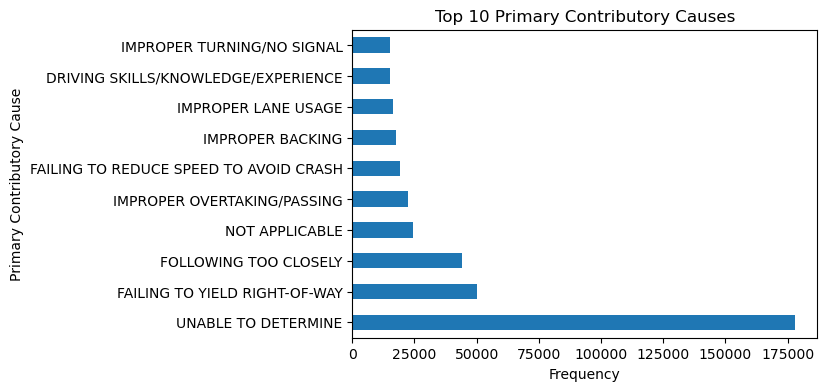

In [55]:
#Frequency of 10 contributory cause
# Get the top ten contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10)

# Plot the top ten contributory causes
plt.figure(figsize=(6, 4))
top_10_causes.plot(kind='barh')
plt.title('Top 10 Primary Contributory Causes')
plt.ylabel('Primary Contributory Cause')
plt.xlabel('Frequency')
plt.show()

### 4.1.2. Numeric Variables

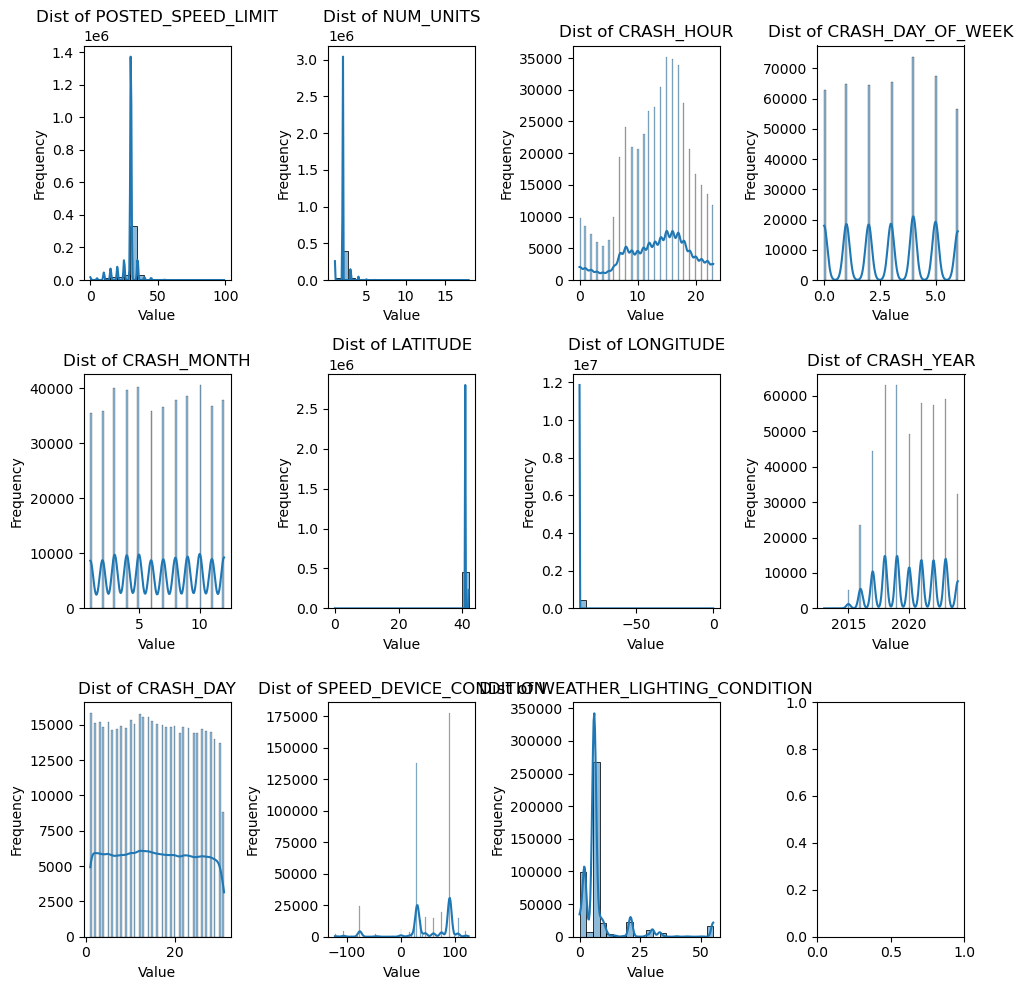

In [40]:
# distribution of numerical columns
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(10, 10))

for ax, col in zip(axs.ravel(), df_new.select_dtypes(include='number').columns):
    sns.histplot(df_new[col], kde=True, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dist of {col}')


plt.tight_layout()
plt.show()

### 4.1.3. Categorical Variables

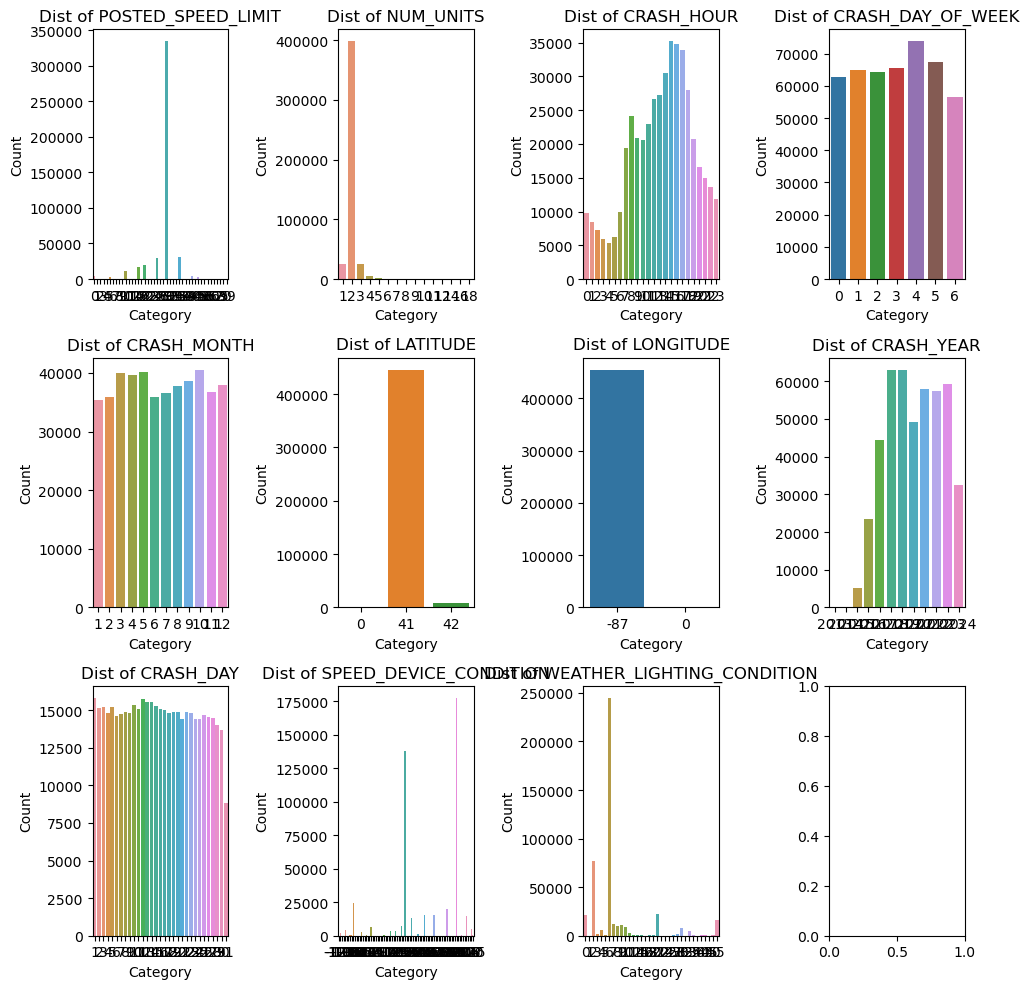

In [41]:
# distribution of numerical columns
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(10, 10))

for ax, col in zip(axs.ravel(), df_new.select_dtypes(include='number').columns):
    sns.countplot(data=df_new, x=col, ax=ax,)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_title(f'Dist of {col}')



plt.tight_layout()
plt.show()

## 4.2 Bivaret Analysis

### 4.2.1. Categorical vs Categorical

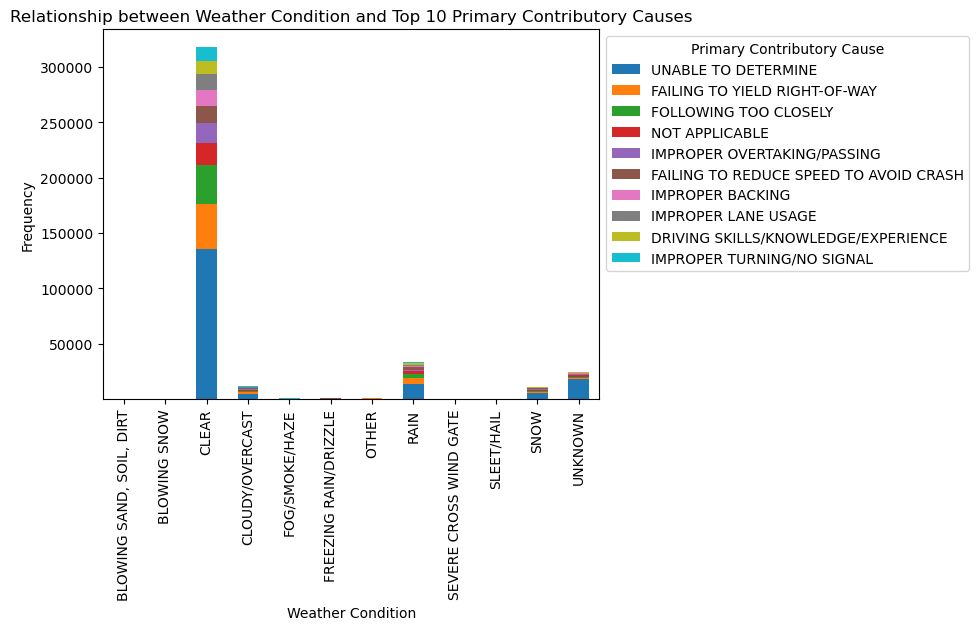

In [42]:
#Relationship between Weather Condition and Top 10 Primary Contributory Causes'
# Create a cross-tabulation table
cross_tab = pd.crosstab(df_new['WEATHER_CONDITION'], df_new['PRIM_CONTRIBUTORY_CAUSE'])

# Calculate the top 10 primary contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index

# Filter the cross-tabulation table to include only the top 10 causes
cross_tab_top_10 = cross_tab[top_10_causes]

# Plot the clustered bar chart
cross_tab_top_10.plot(kind='bar', stacked=True)
plt.title('Relationship between Weather Condition and Top 10 Primary Contributory Causes')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.legend(title='Primary Contributory Cause', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


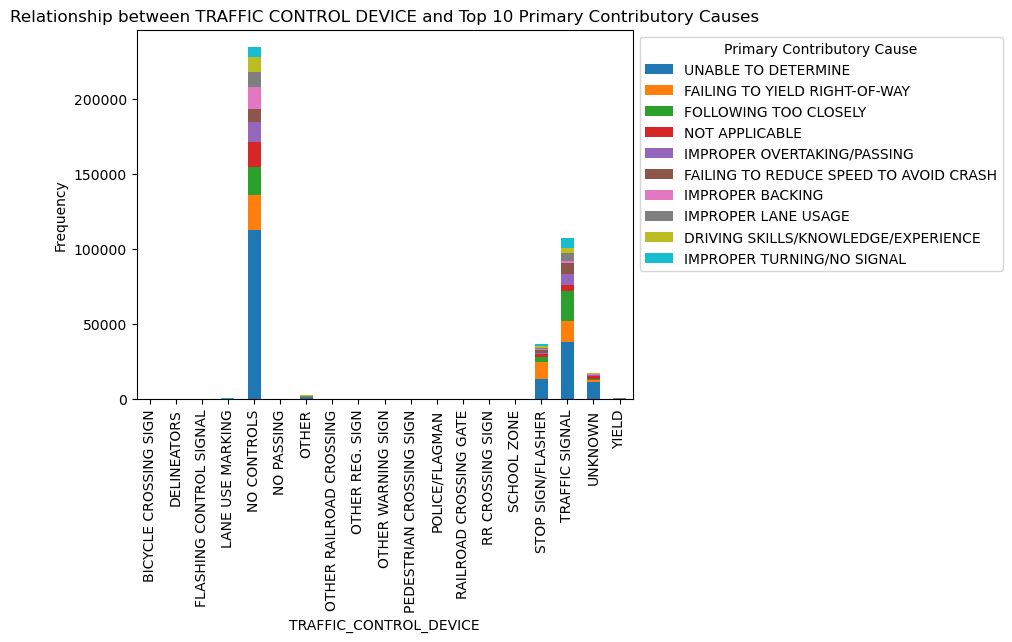

In [43]:
#Relationship between Weather Condition and Top 10 Primary Contributory Causes'
# Create a cross-tabulation table
cross_tab = pd.crosstab(df_new['TRAFFIC_CONTROL_DEVICE'], df_new['PRIM_CONTRIBUTORY_CAUSE'])

# Calculate the top 10 primary contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index

# Filter the cross-tabulation table to include only the top 10 causes
cross_tab_top_10 = cross_tab[top_10_causes]

# Plot the clustered bar chart
cross_tab_top_10.plot(kind='bar', stacked=True)
plt.title('Relationship between TRAFFIC CONTROL DEVICE and Top 10 Primary Contributory Causes')
plt.xlabel('TRAFFIC_CONTROL_DEVICE')
plt.ylabel('Frequency')
plt.legend(title='Primary Contributory Cause', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

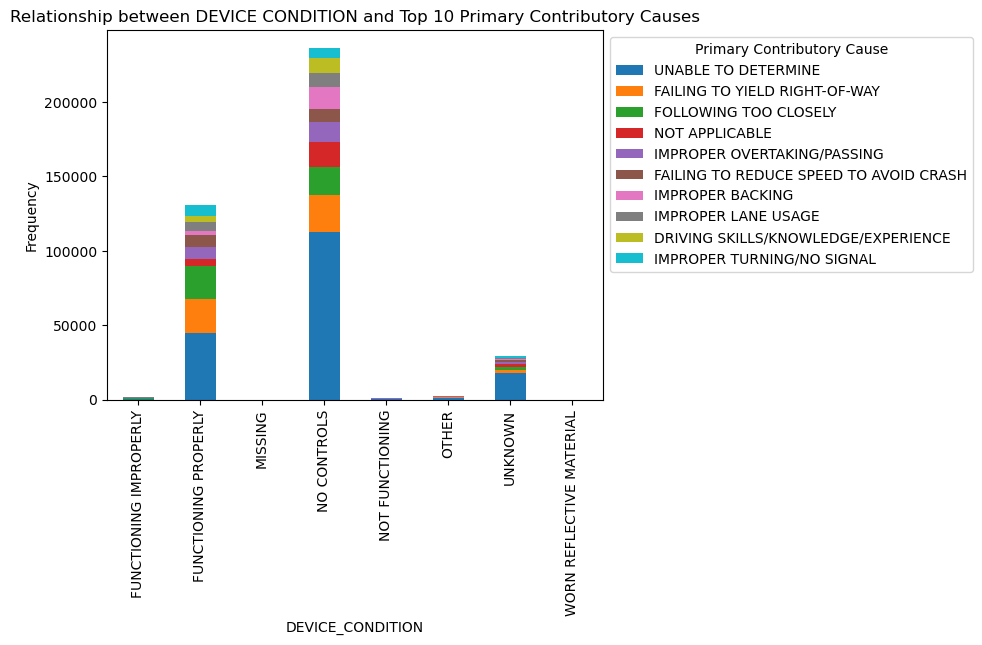

In [44]:
#Relationship between Weather Condition and Top 10 Primary Contributory Causes'
# Create a cross-tabulation table
cross_tab = pd.crosstab(df_new['DEVICE_CONDITION'], df_new['PRIM_CONTRIBUTORY_CAUSE'])

# Calculate the top 10 primary contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index

# Filter the cross-tabulation table to include only the top 10 causes
cross_tab_top_10 = cross_tab[top_10_causes]

# Plot the clustered bar chart
cross_tab_top_10.plot(kind='bar', stacked=True)
plt.title('Relationship between DEVICE CONDITION and Top 10 Primary Contributory Causes')
plt.xlabel('DEVICE_CONDITION')
plt.ylabel('Frequency')
plt.legend(title='Primary Contributory Cause', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

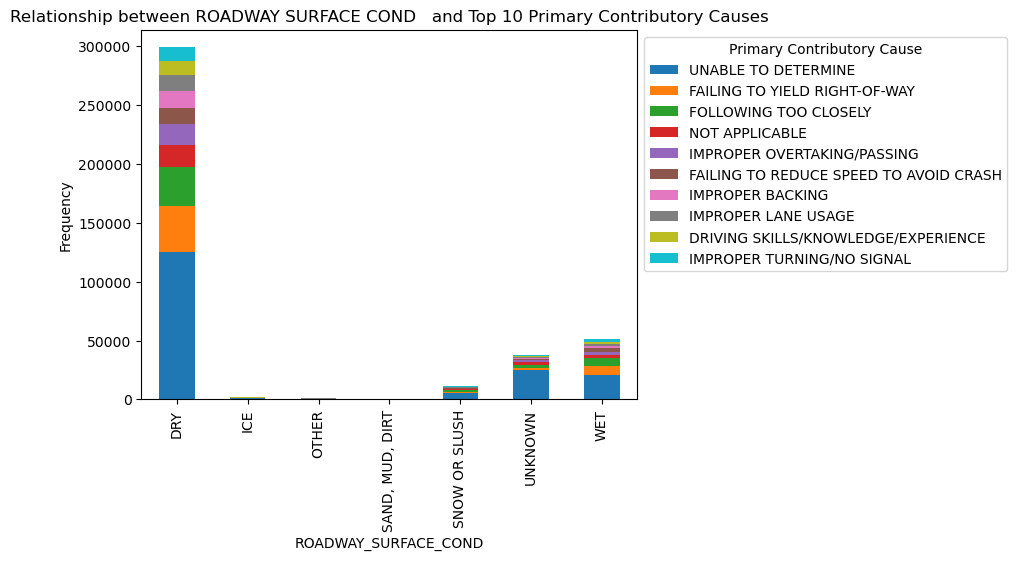

In [45]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(df_new['ROADWAY_SURFACE_COND'], df_new['PRIM_CONTRIBUTORY_CAUSE'])

# Calculate the top 10 primary contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index

# Filter the cross-tabulation table to include only the top 10 causes
cross_tab_top_10 = cross_tab[top_10_causes]

# Plot the clustered bar chart
cross_tab_top_10.plot(kind='bar', stacked=True)
plt.title('Relationship between ROADWAY SURFACE COND   and Top 10 Primary Contributory Causes')
plt.xlabel('ROADWAY_SURFACE_COND')
plt.ylabel('Frequency')
plt.legend(title='Primary Contributory Cause', loc='upper left', bbox_to_anchor=(1, 1))
plt.show() 
    

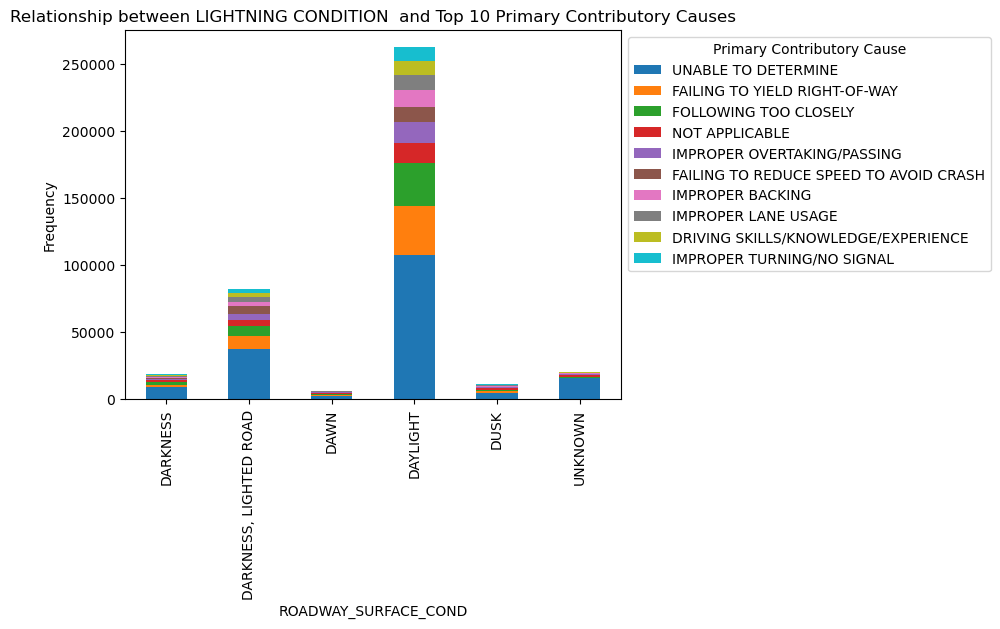

In [46]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(df_new['LIGHTING_CONDITION'], df_new['PRIM_CONTRIBUTORY_CAUSE'])

# Calculate the top 10 primary contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index

# Filter the cross-tabulation table to include only the top 10 causes
cross_tab_top_10 = cross_tab[top_10_causes]

# Plot the clustered bar chart
cross_tab_top_10.plot(kind='bar', stacked=True)
plt.title('Relationship between LIGHTNING CONDITION  and Top 10 Primary Contributory Causes')
plt.xlabel('ROADWAY_SURFACE_COND')
plt.ylabel('Frequency')
plt.legend(title='Primary Contributory Cause', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 4.2.2. Numerical vs Categorical

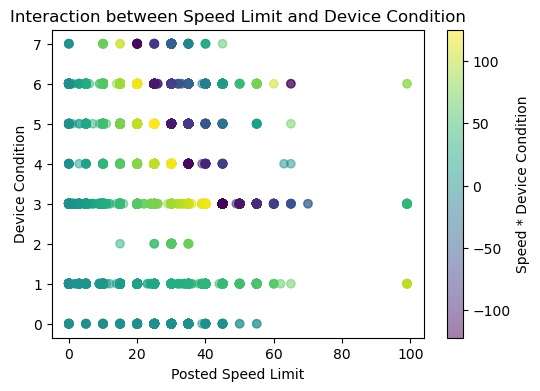

In [48]:
#Scatter Plot of Speed and Device Condition Interaction
plt.figure(figsize=(6, 4))
plt.scatter(df_new['POSTED_SPEED_LIMIT'], df_new['DEVICE_CONDITION'].cat.codes, c=df_new['SPEED_DEVICE_CONDITION'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Speed * Device Condition')
plt.title('Interaction between Speed Limit and Device Condition')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Device Condition')
plt.show()


### 4.2.3. Categorical vs Date/Time


<Axes: title={'center': 'Trend of Car Crashes Over Time'}, xlabel='Date', ylabel='Number of Crashes'>

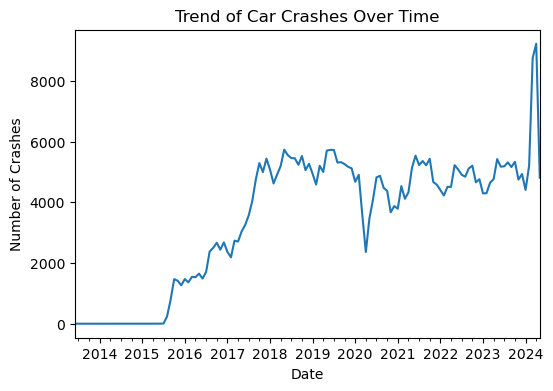

In [49]:
# Trend of car crash over time
df_new.assign(CRASH_DATE=pd.to_datetime(df_new['CRASH_DATE'])).resample('M', on='CRASH_DATE').size().plot(figsize=(6, 4),
title='Trend of Car Crashes Over Time', xlabel='Date', ylabel='Number of Crashes')


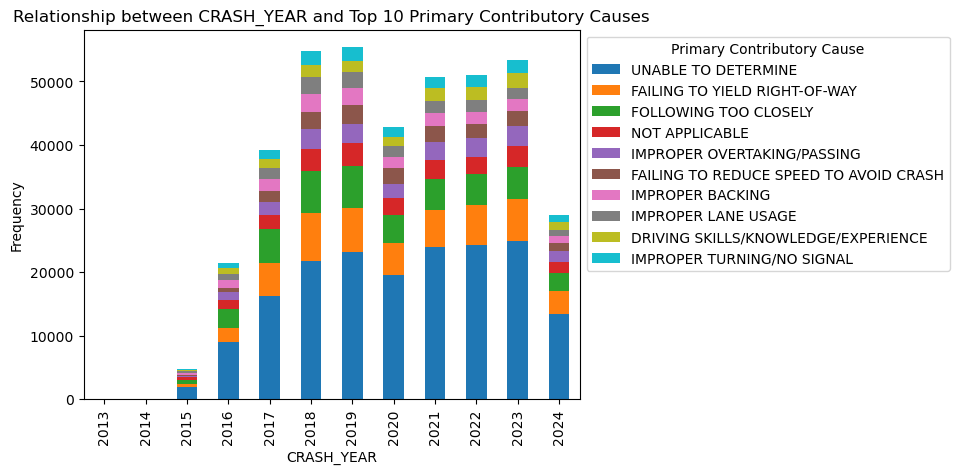

In [50]:
#Primmary contributory cause over time
#top 10 pmc
# Create a cross-tabulation table
cross_tab = pd.crosstab(df_new['CRASH_YEAR'], df_new['PRIM_CONTRIBUTORY_CAUSE'])

# Calculate the top 10 primary contributory causes
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index

# Filter the cross-tabulation table to include only the top 10 causes
cross_tab_top_10 = cross_tab[top_10_causes]

# Plot the clustered bar chart
cross_tab_top_10.plot(kind='bar', stacked=True)
plt.title('Relationship between CRASH_YEAR and Top 10 Primary Contributory Causes')
plt.xlabel('CRASH_YEAR')
plt.ylabel('Frequency')
plt.legend(title='Primary Contributory Cause', loc='upper left', bbox_to_anchor=(1, 1))
plt.show() 

## 4.3. Multivaret Analysis

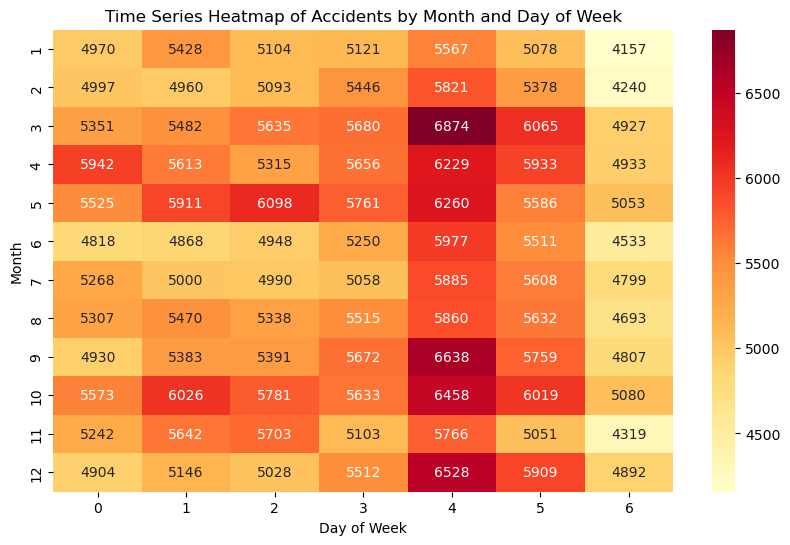

In [51]:
#Time Series Heatmap of Accidents by Month and Day of Week
# Create pivot table for heatmap
heatmap_data = df_new.pivot_table(index='CRASH_MONTH', columns='CRASH_DAY_OF_WEEK', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Time Series Heatmap of Accidents by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()


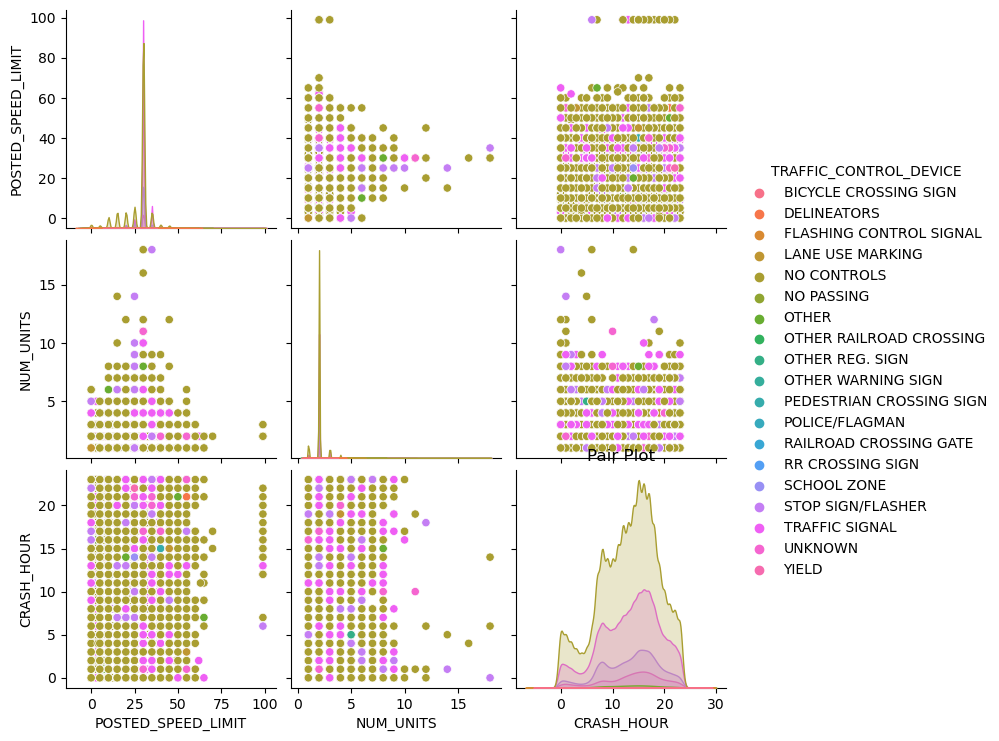

<Figure size 640x480 with 0 Axes>

In [52]:
#using 3columns that can be ordinal or continous to plot a pair plot
# Pair plot
sns.pairplot(data=df_new, vars=['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_HOUR'], hue='TRAFFIC_CONTROL_DEVICE')
plt.title('Pair Plot')
plt.show()
plt.tight_layout()

## 4.3.1 Outliers  Detection 

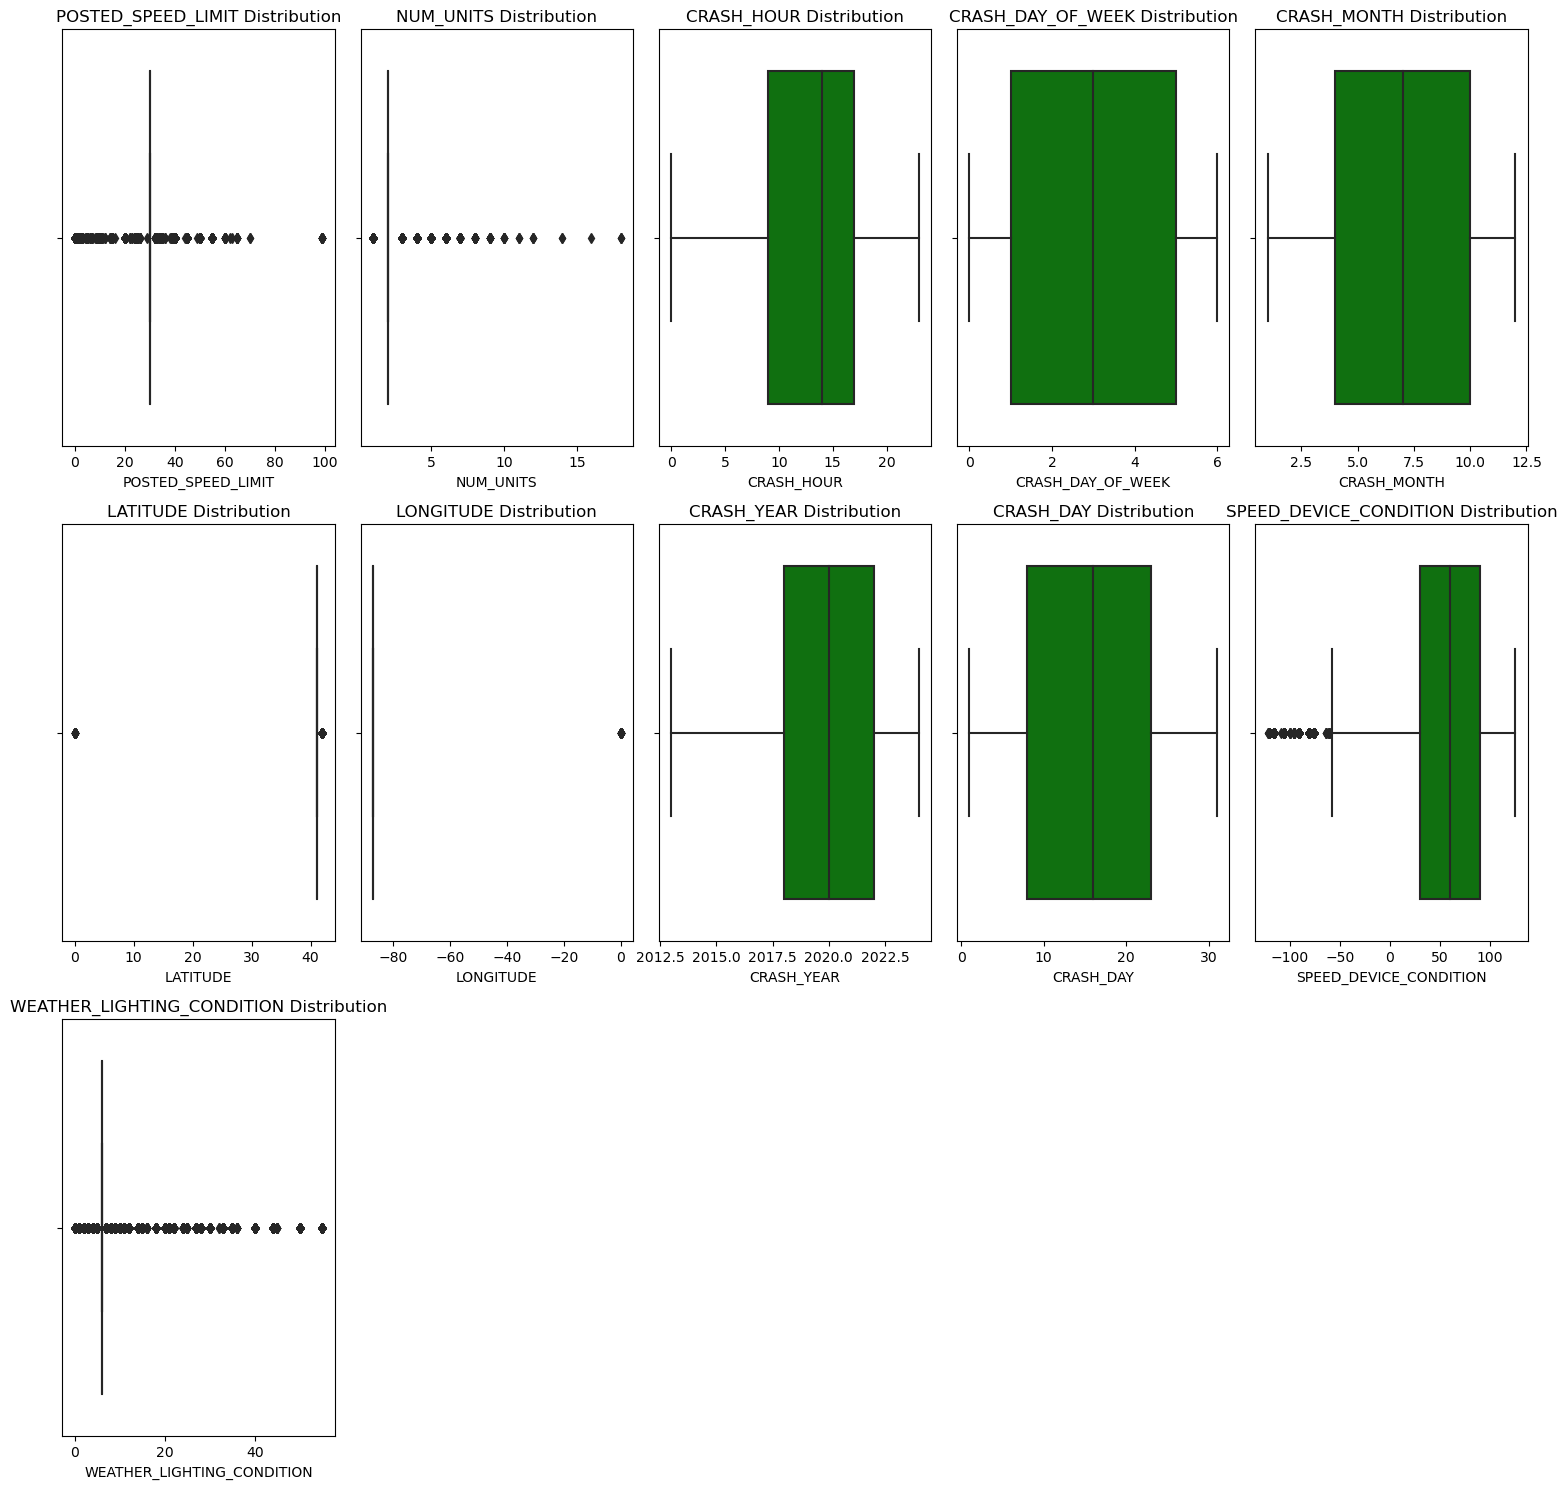

In [53]:
# Detecting outliers in numerical columns
numerical_columns = df_new.select_dtypes(include=['int32', 'int8']).columns
num_plots = len(numerical_columns)
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df_new, x=column, color='green', ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [54]:
# Save the cleaned
df_new.to_csv('CleanedNEW_Eda.csv', index=False)


# 5 . Data Preprocessing

## 5.1. Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

class DataEncoder:
    def __init__(self, data):
        self.df_new = pd.DataFrame(data)  # Convert the dictionary to a DataFrame

    def label_encode(self, columns=None):
        # If columns is None, use all columns
        if columns is None:
            columns = self.df_new.columns

        # Apply label encoding to specified columns
        label_encoder = LabelEncoder()
        for col in columns:
            self.df_new[col] = label_encoder.fit_transform(self.df_new[col])
        
        return self.df_new

# Sample data dictionary
data = {
    
    'TRAFFIC_CONTROL_DEVICE': ['NO CONTROLS','TRAFFIC SIGNALS'],
    'DEVICE_CONDITION': ['NO CONTROLS','FUNCTIONING PROPERLY'],
    'WEATHER_CONDITION': ['CLEAR','RAIN'],
    'LIGHTING_CONDITION': ['DAYLIGHT','DARKNESS, LIGHTED ROAD'],
    'ROADWAY_SURFACE_COND': ['DRY','WET'],
}

# Create an instance of the DataEncoder
encoder = DataEncoder(data)

# Specify columns to encode (for demonstration, we'll encode all)
columns_to_encode = list(data.keys())

# Perform label encoding
df_new_encoded = encoder.label_encode(columns=columns_to_encode)

# Display the encoded DataFrame
df_new_encoded


,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND
0,0,1,0,1,0
1,1,0,1,0,1


In [67]:
from sklearn.preprocessing import LabelEncoder

class DataEncoder:
    def __init__(self, data):
        self.df_new = pd.DataFrame(data)  # Convert the dictionary to a DataFrame

    def label_encode(self, columns=None):
        # If columns is None, use all columns
        if columns is None:
            columns = self.df_new.columns

        # Apply label encoding to specified columns
        label_encoder = LabelEncoder()
        for col in columns:
            self.df_new[col] = label_encoder.fit_transform(self.df_new[col])
        
        return self.df_new

# Sample data dictionary
data = {
    'PRIM_CONTRIBUTORY_CAUSE': [
    'UNABLE TO DETERMINE' ,                     
    'FAILING TO YIELD RIGHT-OF-WAY',              
    'FOLLOWING TOO CLOSELY' ,                   
    'NOT APPLICABLE',                            
    'IMPROPER OVERTAKING/PASSING',               
    'FAILING TO REDUCE SPEED TO AVOID CRASH',    
    'IMPROPER BACKING',                        
    'IMPROPER LANE USAGE',                        
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',       
     'IMPROPER TURNING/NO SIGNAL']
    
}

# Create an instance of the DataEncoder
encoder = DataEncoder(data)

# Specify columns to encode (for demonstration, we'll encode all)
columns_to_encode = list(data.keys())

# Perform label encoding
df_new = encoder.label_encode(columns=columns_to_encode)

# Display the encoded DataFrame
df_new

,PRIM_CONTRIBUTORY_CAUSE
0,9
1,2
2,3
3,8
4,6
5,1
6,4
7,5
8,0
9,7


## 5.5. Multicolinearity

### 5.5.1. Chi-Square

In [68]:
#Use chisquare to adress multicolinierity in categorical columns
class MulticollinearityHandler:
    def __init__(self, df_new_encoded, categorical_vars):
        self.df_new_encoded = df_new_encoded
        self.categorical_vars = categorical_vars
        self.results = []

    def chi_square_test(self, var1, var2):
        contingency_table = pd.crosstab(self.df_new_encoded[var1], self.df_new_encoded[var2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        return chi2, p

    def perform_tests(self):
        for var1, var2 in combinations(self.categorical_vars, 2):
            chi2, p = self.chi_square_test(var1, var2)
            self.results.append((var1, var2, chi2, p))
    
    def print_results(self):
        for var1, var2, chi2, p in self.results:
            print(f"Chi-square test between {var1} and {var2}:")
            print(f"Chi-square statistic: {chi2}")
            print(f"P-value: {p}\n")

    def suggest_drops(self, threshold=0.05):
        high_corr_pairs = [(var1, var2) for var1, var2, chi2, p in self.results if p < threshold]
        variable_groups = {}
        
        # Grouping highly correlated variables
        for var1, var2 in high_corr_pairs:
            if var1 not in variable_groups and var2 not in variable_groups:
                variable_groups[var1] = {var1, var2}
            elif var1 in variable_groups:
                variable_groups[var1].add(var2)
            elif var2 in variable_groups:
                variable_groups[var2].add(var1)
        
        # Suggest one variable to keep per group
        variables_to_keep = {min(group, key=len) for group in variable_groups.values()}
        
        # Variables to drop are those not suggested to keep
        variables_to_drop = set(self.categorical_vars) - variables_to_keep
        
        return variables_to_drop

# implement
categorical_vars = ['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','LIGHTING_CONDITION', 'WEATHER_CONDITION', 'ROADWAY_SURFACE_COND']
handler = MulticollinearityHandler(df, categorical_vars)

# Perform tests
handler.perform_tests()

# Print results
handler.print_results()

# Suggest variables to drop based on multicollinearity
variables_to_drop = handler.suggest_drops()
print(f"Suggested variables to drop: {variables_to_drop}")


Chi-square test between TRAFFIC_CONTROL_DEVICE and DEVICE_CONDITION:
Chi-square statistic: 690581.1689236385
P-value: 0.0

Chi-square test between TRAFFIC_CONTROL_DEVICE and LIGHTING_CONDITION:
Chi-square statistic: 42351.15985189342
P-value: 0.0

Chi-square test between TRAFFIC_CONTROL_DEVICE and WEATHER_CONDITION:
Chi-square statistic: 44299.47571747925
P-value: 0.0

Chi-square test between TRAFFIC_CONTROL_DEVICE and ROADWAY_SURFACE_COND:
Chi-square statistic: 42611.14510950528
P-value: 0.0

Chi-square test between DEVICE_CONDITION and LIGHTING_CONDITION:
Chi-square statistic: 38847.0180524664
P-value: 0.0

Chi-square test between DEVICE_CONDITION and WEATHER_CONDITION:
Chi-square statistic: 44012.587129293825
P-value: 0.0

Chi-square test between DEVICE_CONDITION and ROADWAY_SURFACE_COND:
Chi-square statistic: 53892.26917877303
P-value: 0.0

Chi-square test between LIGHTING_CONDITION and WEATHER_CONDITION:
Chi-square statistic: 209909.37617242814
P-value: 0.0

Chi-square test betwee

## 5.2. Standardization

In [69]:
#Standardizing to scale numeric features to have a mean of 0 and a standard deviation of 1.
#since i chose to keep outliers i chose standardization over scaling
class CustomRangeScaler:
    def __init__(self, range_dict):
        self.range_dict = range_dict

    def fit_transform(self, data):
        scaled_data = data.copy()
        for feature, (min_val, max_val) in self.range_dict.items():
            scaled_data[feature] = (scaled_data[feature] - min_val) / (max_val - min_val)
        return scaled_data

# Sample data (replace with your actual data loading step)
data = {
    'NUM_UNITS': [1, 18],
    'SPEED_DEVICE_CONTROL': [10, 360],
    'CRASH_DATE':[0,24],
}

# Define the desired range for each feature
range_dict = {
    'NUM_UNITS': [1, 18],
    'SPEED_DEVICE_CONTROL': [10, 360],
    'CRASH_DATE':[0,31]
}

# Scale the data
scaler = CustomRangeScaler(range_dict)
df_new_scaled = scaler.fit_transform(pd.DataFrame(data))

# Display the scaled DataFrame and original df
print("Scaled Data:")
df_new_scaled


Scaled Data:


,NUM_UNITS,SPEED_DEVICE_CONTROL,CRASH_DATE
0,0.0,0.0,0.000000
1,1.0,1.0,0.774194


In [70]:
#Concatinanting the dataframes
#Make sure indexes are the same
df_new_encoded.index = df_new_scaled.index

# Concatenate the DataFrames
df_combined = pd.concat([df_new_encoded, df_new_scaled], axis=1)

# Remove duplicate columns if any
df_combined = df_combined.loc[:,~df_combined.columns.duplicated()]

# Display the combined DataFrame
df_combined

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,NUM_UNITS,SPEED_DEVICE_CONTROL,CRASH_DATE
0,0,1,0,1,0,0.0,0.0,0.000000
1,1,0,1,0,1,1.0,1.0,0.774194


## 5.2.1.Variance Inflation Factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting numerical features for VIF calculation
numeric_features = df_combined.select_dtypes(include=['float64', 'int64'])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))]

# Display the VIF data
vif_data


,Feature,VIF
0,NUM_UNITS,inf
1,SPEED_DEVICE_CONTROL,inf
2,CRASH_DATE,inf


In [72]:
#dropping all correlated variables
df_combined = df_combined.drop(columns=['SPEED_DEVICE_CONTROL','NUM_UNITS','CRASH_DATE'])


## 5.6. Splitting the Data

In [84]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df[['PRIM_CONTRIBUTORY_CAUSE']]
y = df['PRIM_CONTRIBUTORY_CAUSE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (8, 1)
X_test shape: (2, 1)
y_train shape: (8,)
y_test shape: (2,)


## 5.7. Scaling

In [85]:
# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled features
print("X_train_scaled:\n", X_train_scaled)
print("X_test_scaled:\n", X_test_scaled)


X_train_scaled:
 [[0. ]
 [1. ]
 [0.5]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [1. ]]
X_test_scaled:
 [[1. ]
 [0.5]]


# 6.MODELLING

## 1. Logistic Regression Model(Baseline-Model)


In [87]:
#Logistic regression
#Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [98]:
# Make predictions on the training data
y_pred_train = model.predict(X_train_scaled)

# Make predictions on the testing data
y_pred_test = model.predict(X_test_scaled)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

#The model performs well on the training data but poorly on the test data, indicating potential overfitting.

Training Accuracy: 0.875
Testing Accuracy: 0.5


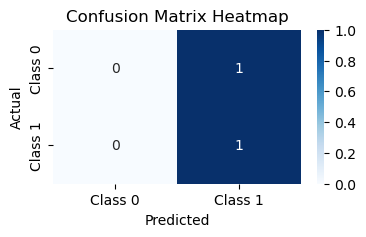

Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [104]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Create a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


#### Hyperparameter tuning for logistic Regression Model

In [99]:
#import necessary libraries
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Hyperparameter tuning with adjusted number of splits
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Use StratifiedKFold to ensure proper handling of small datasets
cv = StratifiedKFold(n_splits=2)  # Adjusted to 2 splits for this small dataset

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_test_accuracy = accuracy_score(y_test, y_pred_best)
print("Best Testing Accuracy:", best_test_accuracy)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-validation Score: 0.875
Best Testing Accuracy: 0.5


In [108]:
#Regularisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Regularization parameter
C = 1.0  # Inverse of regularization strength; smaller values specify stronger regularization

# Create logistic regression model with L2 regularization (Ridge)
logreg_l2 = LogisticRegression(penalty='l2', C=C, solver='liblinear')

# Train the model
logreg_l2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_l2 = logreg_l2.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy with L2 regularization:", accuracy_l2)


Accuracy with L2 regularization: 0.5


## 2.DecisionTreeClassifier

In [159]:
#Train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
# Make predictions
y_pred_dec = clf.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Predictions: [2 0]
Accuracy: 0.5


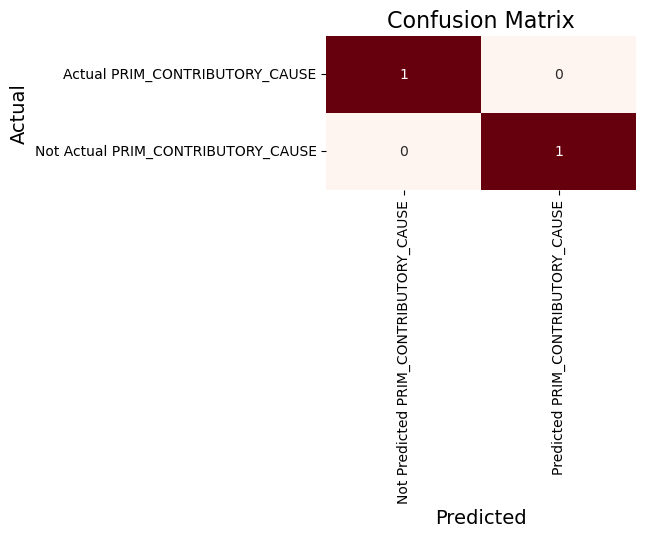

In [163]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dec)

# Plot confusion matrix
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Predicted PRIM_CONTRIBUTORY_CAUSE', 'Predicted PRIM_CONTRIBUTORY_CAUSE'],
            yticklabels=['Actual PRIM_CONTRIBUTORY_CAUSE', 'Not Actual PRIM_CONTRIBUTORY_CAUSE'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


#### Hyperparameter tuning for logistic DecisionTreeClassifier

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the original training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.875


## 3. KNeighborsClassifier

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#create knn object classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the Classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [156]:
#Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the predictions
print("Predictions:", y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)


Predictions: [2 0]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


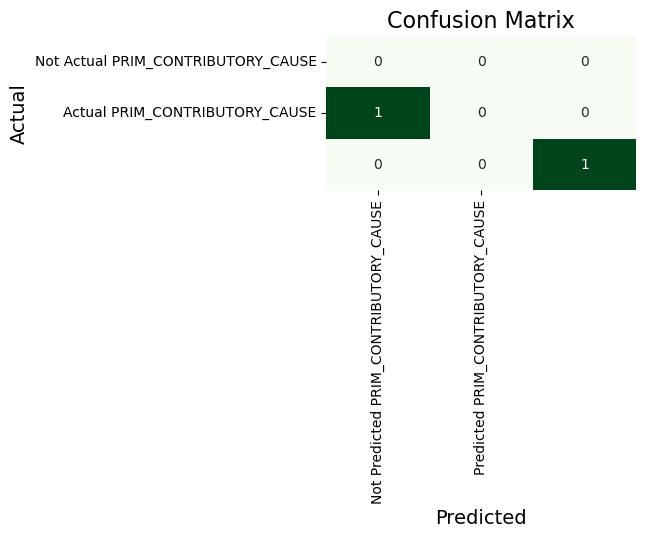

In [158]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Predicted PRIM_CONTRIBUTORY_CAUSE', 'Predicted PRIM_CONTRIBUTORY_CAUSE'],
            yticklabels=['Not Actual PRIM_CONTRIBUTORY_CAUSE', 'Actual PRIM_CONTRIBUTORY_CAUSE'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## 4. RandomForestClassifier

In [143]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)



RandomForestClassifier()

In [144]:
# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))



Random Forest Classifier:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


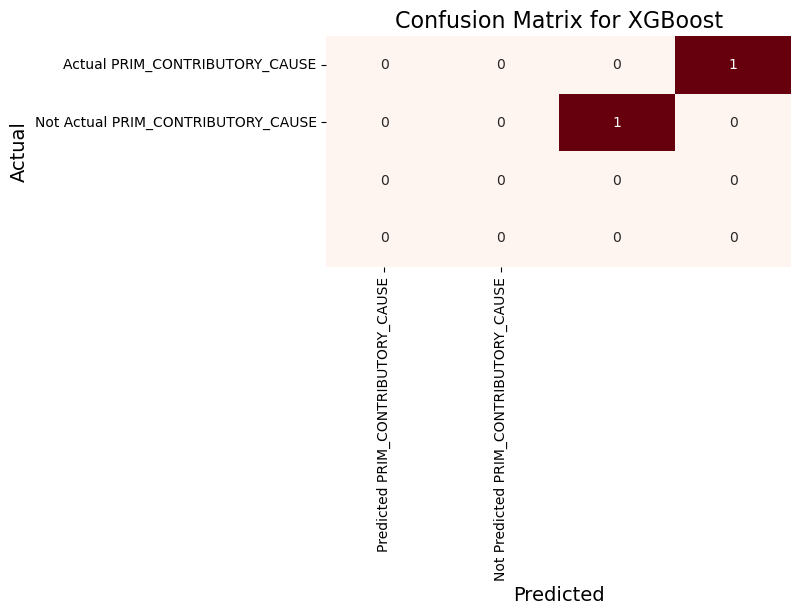

In [151]:
from sklearn.metrics import confusion_matrix
# Construct confusion matrix (example data)
cm = confusion_matrix(true_labels, predicted_labels)


# Plot confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted PRIM_CONTRIBUTORY_CAUSE', 'Not Predicted PRIM_CONTRIBUTORY_CAUSE'],
            yticklabels=['Actual PRIM_CONTRIBUTORY_CAUSE', 'Not Actual PRIM_CONTRIBUTORY_CAUSE'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix for XGBoost', fontsize=16)
plt.show()


# 7. MODEL EVALUATION

## 1.Logistic Regression Classifier(Baseline-Model)


Training Accuracy: The accuracy of the model on the training data is 0.875, which means that it correctly predicted 87.5% of the samples in the training set.

Testing Accuracy: The accuracy of the model on the testing data is 0.5, which means that it correctly predicted 50% of the samples in the testing set.

Confusion Matrix:

The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions. In this case, the confusion matrix is: lua Copy code [[0 1] [0 1]] This indicates that the model correctly predicted one sample as class 2 (true positive), but misclassified one sample as class 2 when it actually belongs to class 1 (false positive). Classification Report:

 For class 1: Precision: 0.00 (none of the predicted class 1 samples were actually class 1) Recall: 0.00 (none of the actual class 1 samples were correctly predicted) F1-score: 0.00 (harmonic mean of precision and recall) Support: 1 (one sample of class 1) For class 2: Precision: 0.50 (50% of the predicted class 2 samples were actually class 2) Recall: 1.00 (100% of the actual class 2 samples were correctly predicted) F1-score: 0.67 (harmonic mean of precision and recall) Support: 1 (one sample of class 2) Macro Avg and Weighted Avg:




## 2.DecisionTreeClassifier


Predictions: The predictions made by the DecisionTreeClassifier model are [2, 0]. This suggests that the model predicted class 2 for the first sample and class 0 for the second sample.

Accuracy: The accuracy of the model on the testing dataset is 0.5. This means that the model correctly predicted 50% of the samples in the testing set.

Best Parameters: The best parameters found by grid search cross-validation for the DecisionTreeClassifier are:

criterion: 'gini' max_depth: None min_samples_leaf: 1 min_samples_split: 2 Best Accuracy Score: The best accuracy score achieved during grid search cross-validation is 0.875. This represents the mean accuracy of the model across different folds of the training data, using the best parameters.

Comparing the testing accuracy (0.5) with the best accuracy score from cross-validation (0.875), it seems that the model is not generalizing well to unseen data. This discrepancy suggests potential overfitting or issues with the model's performance on the testing set.

## 3.KNeighborsClassifier

3.KNeighborsClassifier
Accuracy: The accuracy of the model on the testing dataset is 0.5. This means that the model correctly predicted 50% of the samples in the testing set.

Confusion Matrix:

The confusion matrix is a table that describes the performance of a classification model. It presents the counts of true positive, true negative, false positive, and false negative predictions. In this case, the confusion matrix is: lua Copy code [[0 0 0] [1 0 0] [0 0 1]] This indicates that the model correctly predicted one sample as class 0 (true negative) and one sample as class 2 (true positive), but misclassified one sample as class 1 when it actually belongs to class 0 (false positive). The confusion matrix provides insights into the performance of the model for each class. In this case, it seems that the model has issues correctly predicting samples, especially for classes 1 and 2. Further analysis and potentially model refinement are recommended to improve the model's performance. This could include adjusting hyperparameters, exploring different algorithms, or preprocessing the data to improve its quality.

## 4.RandomForestClassifier


Accuracy: The accuracy of the model on the testing dataset is 1.0. This means that the model correctly predicted all samples in the testing set, achieving 100% accuracy.

Classification Report:

The classification report provides a summary of precision, recall, and F1-score for each class, along with support (the number of samples in each class). For both classes 1 and 2, the precision, recall, and F1-score are all 1.0. This indicates perfect performance for both classes, with no false positives or false negatives. Confusion Matrix:

The confusion matrix is a table that describes the performance of a classification model. It presents the counts of true positive, true negative, false positive, and false negative predictions. In this case, the confusion matrix is: lua Copy code [[1 0] [0 1]] This indicates that the model correctly predicted one sample as class 1 (true positive) and one sample as class 2 (true positive), with no misclassifications.

# CONCLUSION

Data Quality and Availability:This data had many columns,carefully handling of the multiclass data is key.

Feature Importance: Weather Condition,Lighting Condition,Device Control and Traffic Control Devices have proven to be among the factors that Facilitates primary car crashes.

Interpretability: By using RandomClassifier for prediction of car crashes one is sure of Accuracy.


# RECOMMENDATION

Data Collaboration and Integration: Collaborate with relevant stakeholders, including local authorities, transportation departments, and law enforcement agencies, to access and integrate diverse datasets related to car accidents. This collaboration will enrich the analysis and enhance the predictive capabilities of the classifier.

Feature Engineering: Explore advanced feature engineering techniques to extract valuable insights from raw data, such as temporal patterns, spatial relationships, and interaction effects between variables. This process will improve the discriminatory power of the classifier and enhance its predictive accuracy.

Model Optimization: Continuously optimize the developed classifier by fine-tuning model parameters, exploring ensemble methods, and experimenting with advanced machine learning techniques. This iterative process will improve the model's performance and adaptability to changing patterns in car accidents over time.

Community Engagement: Engage with the community through educational campaigns, public forums, and feedback mechanisms to raise awareness about road safety and solicit input on potential interventions. This involvement will foster a collaborative approach to addressing the underlying causes of car accidents and promoting safer driving behaviors.

Policy Implementation: Translate the insights generated by the classifier into actionable policies and interventions aimed at reducing the frequency and severity of car accidents in Chicago. Work closely with policymakers, urban planners, and law enforcement agencies to implement targeted measures that address the identified risk factors effectively.

Monitoring and Evaluation: Establish a framework for monitoring and evaluating the impact of implemented interventions on road safety outcomes. Continuously track key performance indicators, such as accident rates, injury severity, and compliance with traffic regulations, to assess the effectiveness of interventions and inform future decision-making.